# Tutorial 6: Data Visualization

## Objectives

After this tutorial you will be able to:

*   Understand basic concepts of data visualization
*   Use Pandas, Matplotlib, and Seaborn to create different types of plots
*   Customize plots to make them more informative and visually appealing
*   Apply data visualization techniques to visualize and explore datasets

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#import-1">Import dataset 1</a>
    </li>
    <br>
    <li>
        <a href="#heatmap">Cross Tabulation and Heatmap Plot</a>
    </li>
    <br>
    <li>
        <a href="#line">Line Plot</a>
    </li>
    <br>
    <li>
        <a href="#bar">Bar Plot</a>
    </li>
    <br>
    <li>
        <a href="#pie">Pie Plot</a>
    </li>
    <br>
    <li>
        <a href="#import-2">Import dataset 2</a>
    </li>
    <br>
    <li>
        <a href="#histogram">Histograms</a>
    </li>
    <br>
    <li>
        <a href="#box">Box Plot</a>
    </li>
    <br>
    <li>
        <a href="#scatter">Scatter Plot</a>
    </li>
    <br>
</ol>


<hr id="import">

<h2>1. Import the dataset</h2>

Import the `Pandas` library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the data from `csv` into a `Pandas DataFrame`

In [2]:
df = pd.read_csv('IHMStefanini_industrial_safety_and_health_database.csv')
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [3]:
df.tail()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others
435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others
436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals
437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut
438,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level)


Get information about the columns of the `DataFrame`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      439 non-null    object
 1   Countries                 439 non-null    object
 2   Local                     439 non-null    object
 3   Industry Sector           439 non-null    object
 4   Accident Level            439 non-null    object
 5   Potential Accident Level  439 non-null    object
 6   Genre                     439 non-null    object
 7   Employee ou Terceiro      439 non-null    object
 8   Risco Critico             439 non-null    object
dtypes: object(9)
memory usage: 31.0+ KB


Standardize data

In [5]:
# convert column to datetime
df['Data'] = pd.to_datetime(df['Data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      439 non-null    datetime64[ns]
 1   Countries                 439 non-null    object        
 2   Local                     439 non-null    object        
 3   Industry Sector           439 non-null    object        
 4   Accident Level            439 non-null    object        
 5   Potential Accident Level  439 non-null    object        
 6   Genre                     439 non-null    object        
 7   Employee ou Terceiro      439 non-null    object        
 8   Risco Critico             439 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 31.0+ KB


In [6]:
# create a new column for unique months
df['Month'] = df['Data'].dt.year.astype(str) + '-' + df['Data'].dt.month.astype(str).str.zfill(2)
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico,Month
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016-01
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016-01
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016-01
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,2016-01
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,2016-01


<hr id="heatmap">

<h2>2. Cross Tabulation and Heatmap Plot</h2>

Heatmaps show the magnitude of a variable across two dimensions with colors.

In [7]:
# group by month and count the number of accidents
df_country_level = df.groupby(['Countries', 'Accident Level'], as_index=False)['Data'].count()
df_country_level


,Countries,Accident Level,Data
0,Country_01,I,192
1,Country_01,II,19
2,Country_01,III,21
3,Country_01,IV,23
4,Country_01,V,8
5,Country_02,I,99
6,Country_02,II,19
7,Country_02,III,7
8,Country_02,IV,6
9,Country_02,V,1


A more convenient and compact way to see the distribution of a parameter accross 2 different groups or categories of data is a `pivot table` or a `heatmap plot`

In [8]:
# create a pivot table showing the number of accidents by country and by accident level
df_country_level.rename(columns={'Data': 'Accident Count'}, inplace=True)
pivot = df_country_level.pivot(index='Countries',columns='Accident Level')
pivot

Accident Count                       
Accident Level              I    II   III    IV    V
Countries                                           
Country_01              192.0  19.0  21.0  23.0  8.0
Country_02               99.0  19.0   7.0   6.0  1.0
Country_03               37.0   2.0   3.0   2.0  NaN

To create any plot using the `matplotlib` library, we simply use the `pyplot` module (assigned an alias of `plt` in this file) and use the corresponding plot type method.

Common plot types:

| PLOT TYPE         |  pyplot method        |
| ---               |  ---                  |
| line (default)    |  `plot(x, y)`         |
| scatter           |  `scatter(x, y)`      |
| bar               |  `bar(x, height)`     |
| pie               |  `pie(x, labels)`     |
| histogram         |  `hist(x)`            |
| box               |  `box(x)`             |
| heatmap           |  `pcolor(matrix)`     |

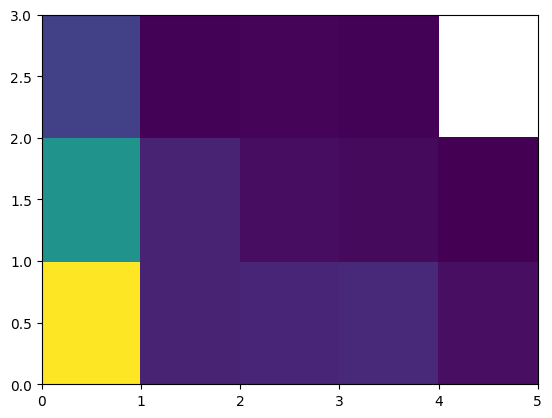

In [9]:
# plot heatmap
plt.pcolor(pivot)

That's how easy it is to create a plot with `matplotlib`!  
  
But we can add a few adjustments to make it much clearer (e.g. title, axes labels, etc.)  
There are a lot of available methods to add different elements to the active plot.  
Once a plot is created, all we need to do is call the required method from the `pyplot (plt)` module, and that method will be applied to the active plot.

C:\Users\chesa\AppData\Local\Temp\ipykernel_15540\4012848929.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


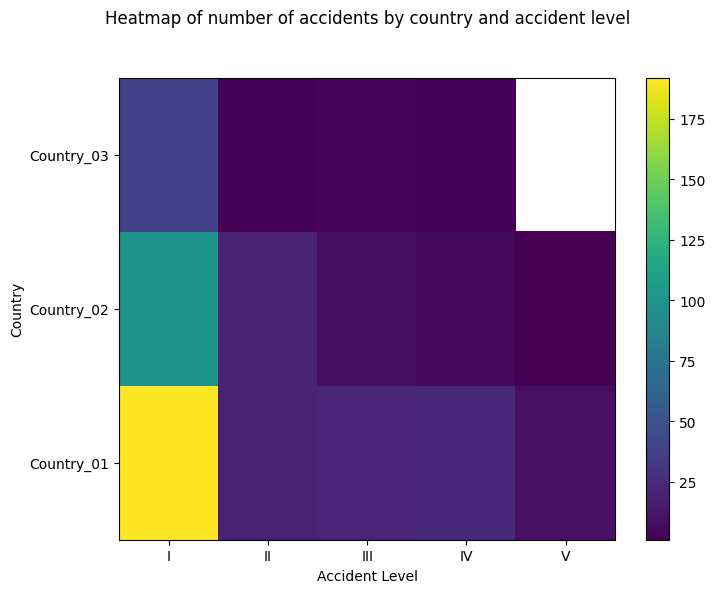

In [10]:
# create a blank figure with a size of 8x6 inches
plt.figure(figsize=(8, 6))

# create heatmap plot
plt.pcolor(pivot)

# add a colorbar
plt.colorbar()

# add a plot title
plt.title('Heatmap of number of accidents by country and accident level', y=1.1)

# add Y-axis title
plt.ylabel('Country')

# updated Y-axis ticks/labels
plt.yticks(ticks=np.arange(len(pivot)) + 0.5, labels=pivot.index)

# add X-axis title
plt.xlabel('Accident Level')

# update X-axis ticks/labels
plt.xticks(np.arange(len(pivot.columns)) + 0.5, [x[1] for x in pivot.columns])

# show plot (this is only required in Python script files, but it is called by default in Jupyter Notebooks)
plt.show()

Now this looks much better and clearer!

<hr id="line">

<h2>3. Line Plot</h2>

Line plots show trends and changes over time.

In [11]:
# groupd by month
df_months = df.groupby('Month', as_index=False)['Accident Level'].count()
df_months

,Month,Accident Level
0,2016-01,12
1,2016-02,43
2,2016-03,34
3,2016-04,29
4,2016-05,26
5,2016-06,33
6,2016-07,19
7,2016-08,21
8,2016-09,24
9,2016-10,21


We can plot the `line` chart using the `pyplot (plt)` module

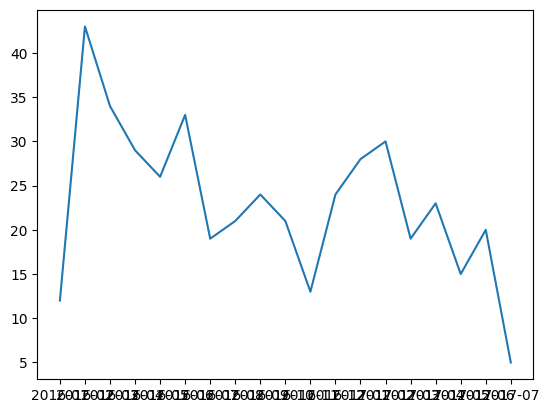

In [12]:
plt.plot(df_months['Month'], df_months['Accident Level'])

Or, a very big advantage of the `Pandas` library is that it integrates with `matplotlib` and has plotting capabilities built into the `DataFrame` objects.  
To plot data from a `DataFrame`, all we need to do is call the `plot()` method on the `DataFrame` and specify the `kind` parameter as the required plot type.  

For example, here are the equivalent `Pandas` methods to the `plt` methods mentioned above:

| PLOT TYPE         |  pyplot method        | DataFrame method                  |
| ---               |  ---                  | ---                               |
| line (default)    |  `plot(x, y)`         | `plot(kind='line', x, y)`         |
| scatter           |  `scatter(x, y)`      | `plot(kind='scatter', x, y)`      |
| bar               |  `bar(x, height)`     | `plot(kind='bar', x, y)`          |
| pie               |  `pie(x, labels)`     | `plot(kind='pie', x, y)`          |
| histogram         |  `hist(x)`            | `plot(kind='hist', x)`            |
| box               |  `box(x)`             | `plot(kind='box', x)`             |

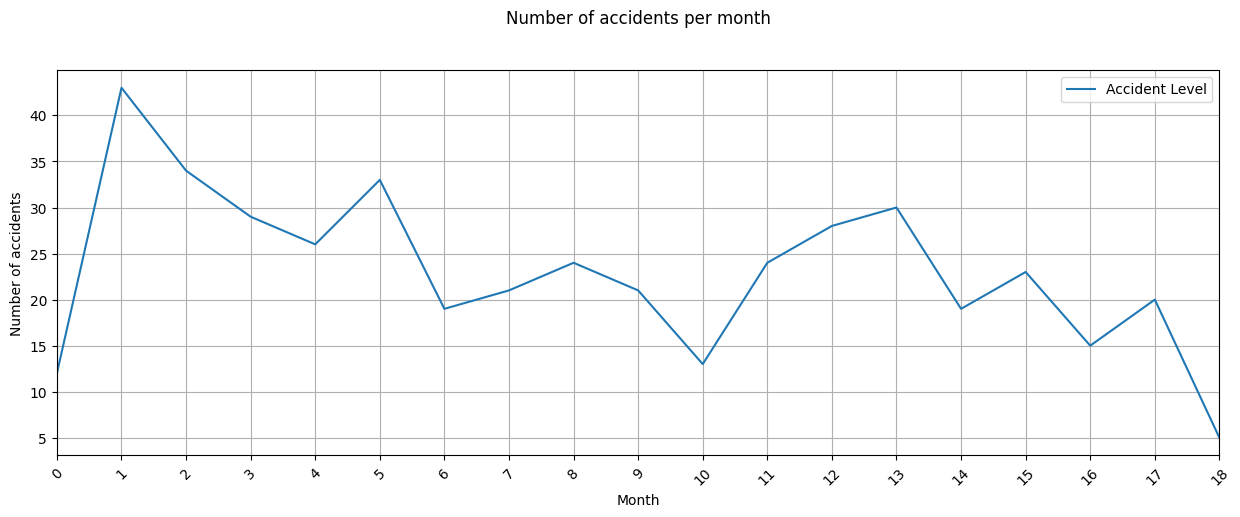

In [13]:
# line plot with adjustments

# we can also spepcify the figure size in the DataFrame plot method
df_months.plot(kind='line', figsize=(15, 5), x='Month', y='Accident Level')

# plot title
plt.title('Number of accidents per month', y=1.1)

# X-axis title
plt.xlabel('Month')

# Y-axis title
plt.ylabel('Number of accidents')

# X-axis ticks/labels
plt.xticks(range(len(df_months)), df_months.index, rotation=45)

# set X margins to 0 (spacing between X-axis and the first/last datapoint)
plt.margins(x=0)

# show grid lines
plt.grid()

<hr id="bar">

<h2>4. Bar Plot</h2>

Bar plots compare the values between different categories or groups.

In [14]:
# get accident level counts
df_accident_level = df.groupby('Accident Level')['Accident Level'].count()
df_accident_level

Accident Level
I      328
II      40
III     31
IV      31
V        9
Name: Accident Level, dtype: int64

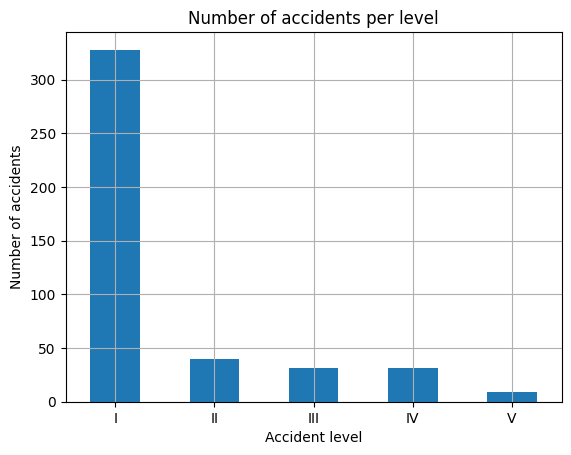

In [15]:
# bar plot

# since the DataFrame only contains one column, we can use the plot method without specifying x and y
df_accident_level.plot(kind='bar')

# plot title
plt.title('Number of accidents per level')

# X-axis title
plt.xlabel('Accident level')

# Y-axis title
plt.ylabel('Number of accidents')

# X-axis ticks/labels
plt.xticks(rotation=0)

# show grid lines
plt.grid()

<hr id="pie">

<h2>5. Pie Plot</h2>

Pie plots show proportion distribution of categories or groups.

In [16]:
# pie plot
df_industry_sector = df.groupby('Industry Sector')['Industry Sector'].count()
df_industry_sector

Industry Sector
Metals    148
Mining    241
Others     50
Name: Industry Sector, dtype: int64

<Axes: ylabel='Industry Sector'>

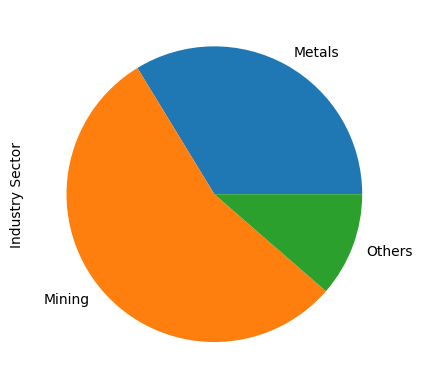

In [17]:
# pie plot
df_industry_sector.plot(kind='pie')

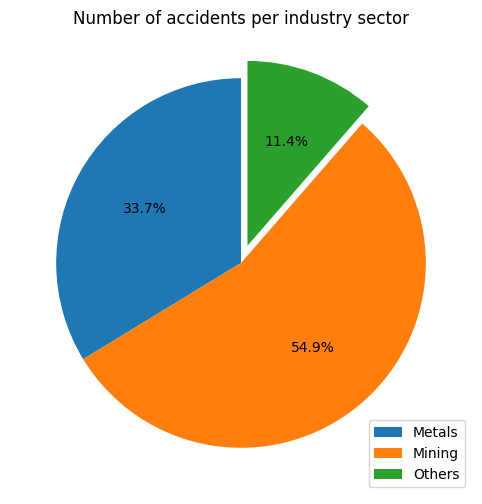

In [18]:
# adjust plot
df_industry_sector.plot(
    kind='pie', 
    figsize=(10, 6), 
    labels=None,            # disable automatic labels (we will add them in the legend in the next step)
    autopct='%1.1f%%',      # format of the percentage values
    startangle=90,          # start angle of the first pie slice
    explode=[0, 0, 0.1]     # a list of values specifying the fraction of the radius with which to offset each pie slice (here we exploe the "Others" slice)
)

# plot title
plt.title('Number of accidents per industry sector')

# remove Y-axis label
plt.ylabel('')

# add legend
plt.legend(labels=df_industry_sector.index, loc='lower right')

<hr id="import-2">

<h2>6. Import the dataset</h2>

Read the data from `csv` into a `Pandas DataFrame`

In [19]:
df = pd.read_csv('sensor_data.csv')
df.head()

,Time [s],CO [ppm],Humidity [%r.h.],Temperature [C],Flow rate [mL/min],Heater voltage [V],R1 [MOhm],R2 [MOhm],R3 [MOhm],R4 [MOhm],R5 [MOhm],R6 [MOhm],R7 [MOhm],R8 [MOhm],R9 [MOhm],R10 [MOhm],R11 [MOhm],R12 [MOhm],R13 [MOhm],R14 [MOhm]
0,0.000,0.0,50.25,26.54,243.0538,0.8805,0.0643,0.1489,0.1056,0.1051,0.1093,0.1341,0.1151,0.1188,0.1062,0.1290,0.1183,0.1204,0.1087,0.1130
1,0.309,0.0,50.25,26.54,242.0039,0.8928,0.0710,0.1436,0.1059,0.1013,0.1081,0.1285,0.1166,0.1103,0.1017,0.1223,0.1139,0.1166,0.1068,0.1110
2,0.619,0.0,50.25,26.54,241.5810,0.8960,0.0762,0.1402,0.1080,0.1007,0.1100,0.1260,0.1188,0.1088,0.1009,0.1215,0.1128,0.1155,0.1067,0.1103
3,0.928,0.0,50.25,26.54,241.1596,0.8980,0.0797,0.1392,0.1112,0.1011,0.1121,0.1252,0.1209,0.1086,0.1007,0.1212,0.1121,0.1152,0.1070,0.1102
4,1.235,0.0,50.25,26.54,240.7642,0.8983,0.0822,0.1395,0.1142,0.1021,0.1143,0.1256,0.1233,0.1086,0.1004,0.1215,0.1120,0.1151,0.1072,0.1102


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295516 entries, 0 to 295515
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time [s]            295516 non-null  float64
 1   CO [ppm]            295516 non-null  float64
 2   Humidity [%r.h.]    295516 non-null  float64
 3   Temperature [C]     295516 non-null  float64
 4   Flow rate [mL/min]  295516 non-null  float64
 5   Heater voltage [V]  295516 non-null  float64
 6   R1 [MOhm]           295516 non-null  float64
 7   R2 [MOhm]           295516 non-null  float64
 8   R3 [MOhm]           295516 non-null  float64
 9   R4 [MOhm]           295516 non-null  float64
 10  R5 [MOhm]           295516 non-null  float64
 11  R6 [MOhm]           295516 non-null  float64
 12  R7 [MOhm]           295516 non-null  float64
 13  R8 [MOhm]           295516 non-null  float64
 14  R9 [MOhm]           295516 non-null  float64
 15  R10 [MOhm]          295516 non-nul

<hr id="histogram">

<h2>7. Histograms</h2>

Histograms show the data distribution similar to a distribution curve but in discrete intervals called `bins`.

<Axes: ylabel='Frequency'>

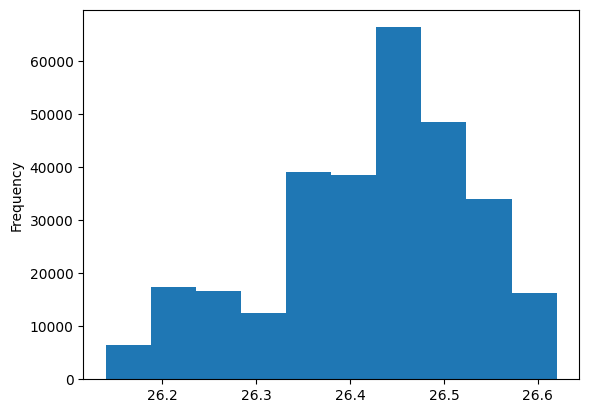

In [21]:
# histogram
df['Temperature [C]'].plot(kind='hist')

As we see in the default plot, the X-ticks do not align with the bins.  
We can specify the number of bins and the ticks for the histogram with the help of the `numpy` function `histogram(list_of_values, number_of_bins)`.  
And the function returns a list with the frequencies, and another list with the bin edges (ticks).

In [22]:
# use numpy to get the histogram data
freq, bin_edges = np.histogram(df['Temperature [C]'], 10)
print(freq)
print(bin_edges)

[ 6421 17408 16614 12580 39009 38464 66365 48465 33910 16280]
[26.14  26.188 26.236 26.284 26.332 26.38  26.428 26.476 26.524 26.572
 26.62 ]


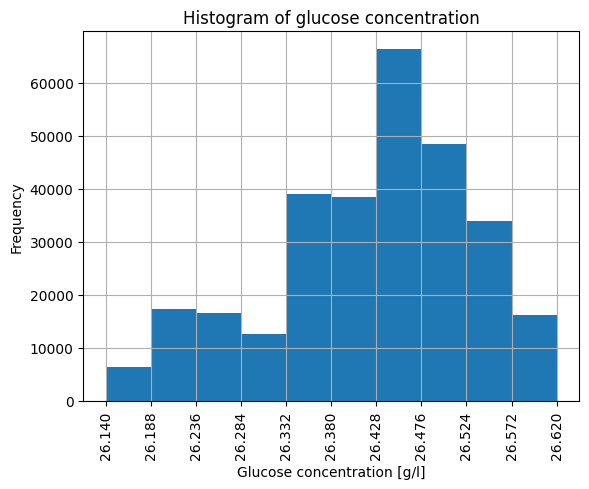

In [23]:
# plot histogram
df['Temperature [C]'].plot(kind='hist', bins=10)

# plot title
plt.title('Histogram of glucose concentration')

# X-axis title
plt.xlabel('Glucose concentration [g/l]')

# X-axis ticks/labels
plt.xticks(bin_edges, rotation=90)

# Y-axis title
plt.ylabel('Frequency')

# show grid lines
plt.grid()

<hr id="box">

<h2>8. Box Plot</h2>

A box (also called box-and-whisker) plot also shows the distribution of a single variable and identifies the outliers.

It also shows the following stats:
- minimum (Q0, excluding outliers)
- first quartile (Q1)
- median (Q2)
- third quartile (Q3)
- maximum (Q4, excluding outliers)
- interquartile range (IQR = Q3 - Q1)
- max outliers (> Q3 + 1.5*IQR)
- min outliers (< Q1 - 1.5*IQR)

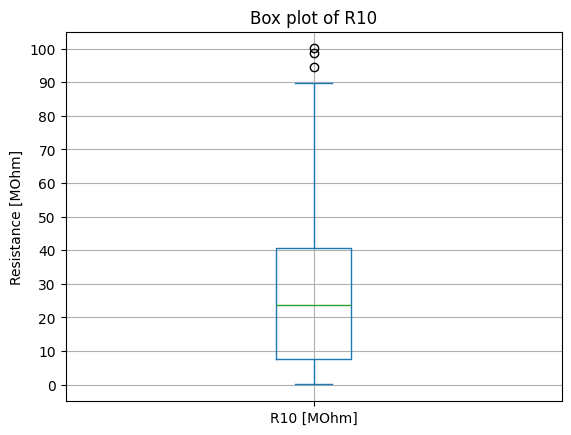

In [24]:
# box plot
df['R10 [MOhm]'].plot(kind='box')

# plot title
plt.title('Box plot of R10')

# Y-axis title
plt.ylabel('Resistance [MOhm]')

# X-axis title
plt.yticks(range(0, 110, 10))

# show grid lines
plt.grid()

We can also plot multiple box plots on the same graph as follows:

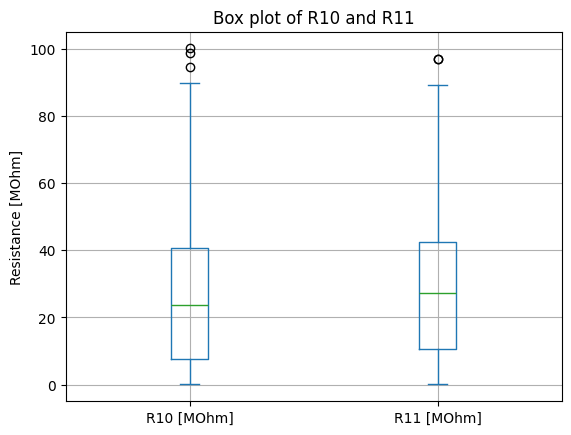

In [25]:
# multiple box plots
df[['R10 [MOhm]', 'R11 [MOhm]']].plot(kind='box')

# plot title
plt.title('Box plot of R10 and R11')

# Y-axis title
plt.ylabel('Resistance [MOhm]')

# show grid lines
plt.grid()

<hr id="scatter">

<h2>9. Scatter Plot</h2>

Scatter plots show the relationships between variables

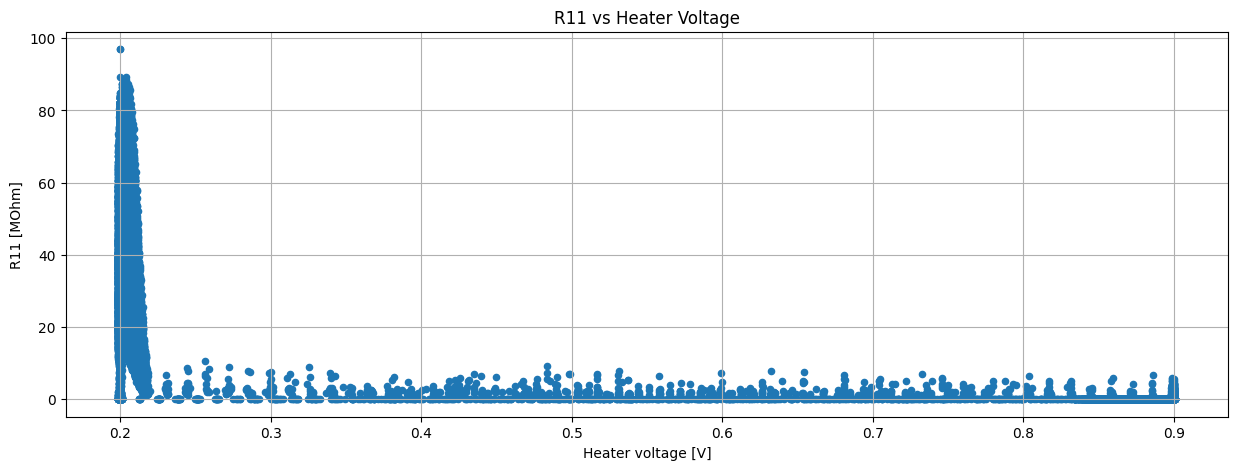

In [26]:
# scatter plot
df.plot(kind='scatter', x='Heater voltage [V]', y='R11 [MOhm]', figsize=(15, 5))

# plot title
plt.title('R11 vs Heater Voltage')

# show grid lines
plt.grid()

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>
<a href="https://www.w3schools.com/python/default.asp">w3schools.com</a>
<br>
<a href="https://www.kaggle.com/datasets/ihmstefanini/industrial-safety-and-health-analytics-database">kaggle.com</a>